In [1]:
import numpy as np
import json
import utm
import matplotlib.pyplot as plt; plt.ion()
from scipy.optimize import least_squares

# Overview

The real-time analysis is not estimating accurately enough.  We need to figure out why.

## Run 481

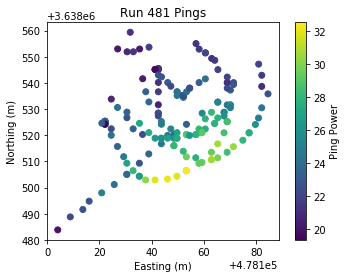

In [2]:
filename = "LOCALIZE_000481"
lines = []
with open(filename) as file:
    for line in file:
        dictionary = json.loads(line.strip())
        if 'ping' in dictionary:
            lines.append(dictionary['ping'])
lon = np.array([line['lon'] for line in lines]) / 1e7
lat = np.array([line['lat'] for line in lines]) / 1e7
amp = 10 * np.log10(np.array([line['amp'] for line in lines]))
alt = np.ones(len(lon)) * 30
coords = np.array([utm.from_latlon(lat[i], lon[i])[0:2] for i in range(len(lon))])
zone = utm.from_latlon(lat[0], lon[0])[2:4]

plt.scatter(coords[:,0], coords[:,1], c = amp)
plt.colorbar(label="Ping Power")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.title("Run 481 Pings")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [3]:
def receivePowerModel(d, k, n):
    return k - 10 * n * np.log10(d)
def distancePowerModel(R, k, n):
    return np.power(10, (k - R)/(10 * n))

In [4]:
def residuals(params, data):
    tx = params[0]
    ty = params[1]
    t_loc = np.array([tx, ty, 0])
    
    k = params[2]
    n = params[3]
    
    R = data[:,3]
    d_loc = data[:,0:3]
    
    residuals = np.zeros(len(R))
    for i in range(len(R)):
        residuals[i] = R[i] - receivePowerModel(np.linalg.norm(t_loc - d_loc[i,:]), k, n)
    return residuals

In [5]:
initialGuess = np.array([np.mean(coords[:,0]), np.mean(coords[:,1]),
                         np.max(amp), 4])
data = np.array([coords[:,0], coords[:,1], alt, amp ]).transpose()
bounds = ([-np.inf, -np.inf, -np.inf, 1],[np.inf, np.inf, np.inf, np.inf])
results = least_squares(residuals, initialGuess, kwargs={'data':data}, bounds=bounds)
print("Estimated location: %d %s %d %d" % (zone[0], zone[1], results.x[0], results.x[1]))
print("Estimated transmit power: %f" % (results.x[2]))
print("Estimated exponent: %f" % (results.x[3]))
result_481 = results

Estimated location: 11 S 478164 3638489
Estimated transmit power: 80.245706
Estimated exponent: 3.220515


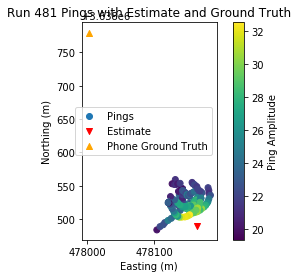

In [6]:
plt.scatter(coords[:,0], coords[:,1], c = amp, label='Pings')
plt.colorbar(label="Ping Amplitude")
plt.scatter(results.x[0], results.x[1], marker="v", label='Estimate', color='red')
plt.scatter(478002, 3638779, marker="^", label='Phone Ground Truth', color='orange')
plt.legend()
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.title("Run 481 Pings with Estimate and Ground Truth")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Fit Analysis

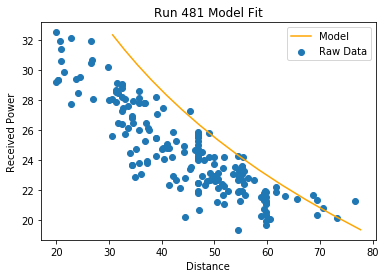

In [7]:
tx_loc = np.array(results.x[0:2])
distances = [np.linalg.norm(data[i,0:2] - tx_loc) for i in range(len(data))]
R = data[:,3]
plt.scatter(distances, R, label='Raw Data')
calc_D = [distancePowerModel(r, results.x[2], results.x[3]) for r in np.arange(np.min(R), np.max(R))]
plt.plot(calc_D, np.arange(np.min(R), np.max(R)), label='Model', color='orange')
plt.legend()
plt.ylabel('Received Power')
plt.xlabel('Distance')
plt.title('Run 481 Model Fit')
plt.show()

## Run 482

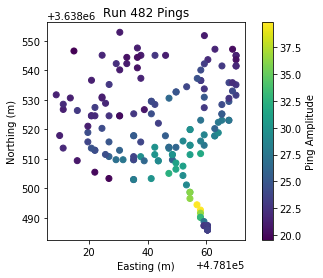

In [8]:
filename = "LOCALIZE_000482"
lines = []
with open(filename) as file:
    for line in file:
        dictionary = json.loads(line.strip())
        if 'ping' in dictionary:
            lines.append(dictionary['ping'])
lon = np.array([line['lon'] for line in lines]) / 1e7
lat = np.array([line['lat'] for line in lines]) / 1e7
amp = 10 * np.log10(np.array([line['amp'] for line in lines]))
alt = np.ones(len(lon)) * 30
coords = np.array([utm.from_latlon(lat[i], lon[i])[0:2] for i in range(len(lon))])
zone = utm.from_latlon(lat[0], lon[0])[2:4]

plt.scatter(coords[:,0], coords[:,1], c = amp)
plt.colorbar(label='Ping Amplitude')
plt.xlabel("Easting (m)")
plt.ylabel('Northing (m)')
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Run 482 Pings")
plt.show()

In [9]:
initialGuess = np.array([np.mean(coords[:,0]), np.mean(coords[:,1]),
                         np.max(amp), 4])
data = np.array([coords[:,0], coords[:,1], alt, amp ]).transpose()
bounds = ([-np.inf, -np.inf, -np.inf, 1],[np.inf, np.inf, np.inf, np.inf])
results = least_squares(residuals, initialGuess, kwargs={'data':data}, bounds=bounds)
print("Estimated location: %d %s %d %d" % (zone[0], zone[1], results.x[0], results.x[1]))
print("Estimated transmit power: %f" % (results.x[2]))
print("Estimated exponent: %f" % (results.x[3]))
result_482 = results

Estimated location: 11 S 478152 3638507
Estimated transmit power: 85.591686
Estimated exponent: 3.793014


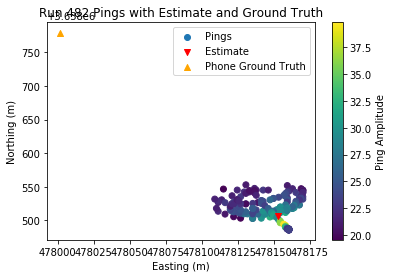

In [10]:
plt.scatter(coords[:,0], coords[:,1], c = amp, label="Pings")
plt.colorbar(label='Ping Amplitude')
plt.scatter(results.x[0], results.x[1], marker="v", label="Estimate", color='red')
plt.scatter(478002, 3638779, marker="^", label="Phone Ground Truth", color='orange')
plt.legend()
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.title('Run 482 Pings with Estimate and Ground Truth')
plt.show()

### Fit Analysis

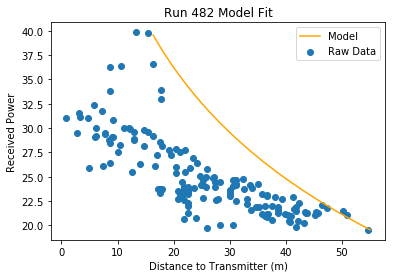

In [11]:
tx_loc = np.array(results.x[0:2])
distances = [np.linalg.norm(data[i,0:2] - tx_loc) for i in range(len(data))]
R = data[:,3]
plt.scatter(distances, R, label='Raw Data')
calc_d = [distancePowerModel(r, results.x[2], results.x[3]) for r in np.arange(np.min(R), np.max(R))]
plt.plot(calc_d, np.arange(np.min(R), np.max(R)), label='Model', color='orange')
plt.legend()
plt.xlabel('Distance to Transmitter (m)')
plt.ylabel('Received Power')
plt.title("Run 482 Model Fit")
plt.show()

## Run 483

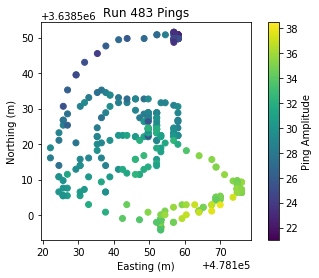

In [12]:
filename = "LOCALIZE_000483"
lines = []
with open(filename) as file:
    for line in file:
        dictionary = json.loads(line.strip())
        if 'ping' in dictionary:
            lines.append(dictionary['ping'])
lon = np.array([line['lon'] for line in lines]) / 1e7
lat = np.array([line['lat'] for line in lines]) / 1e7
amp = 10 * np.log10(np.array([line['amp'] for line in lines]))
alt = np.ones(len(lon)) * 30
coords = np.array([utm.from_latlon(lat[i], lon[i])[0:2] for i in range(len(lon))])
zone = utm.from_latlon(lat[0], lon[0])[2:4]

plt.scatter(coords[:,0], coords[:,1], c = amp, label='Pings')
plt.colorbar(label='Ping Amplitude')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.title('Run 483 Pings')
plt.show()

In [13]:
initialGuess = np.array([np.mean(coords[:,0]), np.mean(coords[:,1]),
                         np.max(amp), 400])
data = np.array([coords[:,0], coords[:,1], alt, amp ]).transpose()
bounds = ([-np.inf, -np.inf, -np.inf, 1],[np.inf, np.inf, np.inf, np.inf])
results = least_squares(residuals, initialGuess, kwargs={'data':data}, bounds=bounds)
print("Estimated location: %d %s %d %d" % (zone[0], zone[1], results.x[0], results.x[1]))
print("Estimated transmit power: %f" % (results.x[2]))
print("Estimated exponent: %f" % (results.x[3]))
result_483 = results

Estimated location: 11 S 478198 3638415
Estimated transmit power: 154.137612
Estimated exponent: 5.955206


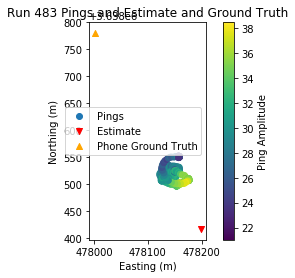

In [14]:
plt.scatter(coords[:,0], coords[:,1], c = amp, label='Pings')
plt.colorbar(label='Ping Amplitude')
plt.scatter(results.x[0], results.x[1], marker="v", label='Estimate', color='red')
plt.scatter(478002, 3638779, marker="^", label='Phone Ground Truth', color='orange')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.title('Run 483 Pings and Estimate and Ground Truth')
plt.show()

### Fit Analysis

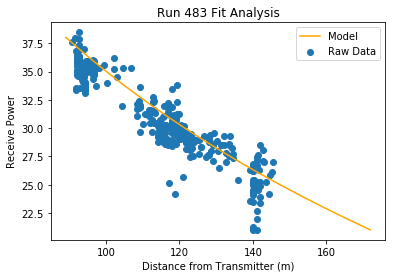

In [15]:
tx_loc = np.array(results.x[0:2])
distances = [np.linalg.norm(data[i,0:2] - tx_loc) for i in range(len(data))]
R = data[:,3]
plt.scatter(distances, R, label='Raw Data')
calc_d = [distancePowerModel(r, results.x[2], results.x[3]) for r in np.arange(np.min(R), np.max(R))]
plt.plot(calc_d, np.arange(np.min(R), np.max(R)), label='Model', color='orange')
plt.xlabel('Distance from Transmitter (m)')
plt.ylabel('Receive Power')
plt.legend()
plt.title('Run 483 Fit Analysis')
plt.show()

# Conclusions

The data is internally consistent, however, external ground truth appears to be wrong.  According to cell phone GPS, the test transmitter was located at 11 S 478002 3638779.  However, this is inconsistent with the flight area.

If we look at the flight location on Google Maps Satellite imagery, the test transmitter appears to be located at 32.8842, -117.2335.  The equivalent location is 11 S 478459 3638473.  The estimates are within 25 meters of this location.

This suggests that we need a better ground truth.

In [16]:
ll = (32.8842, -117.2335)
gm_gt = utm.from_latlon(ll[0], ll[1])
error_481 = np.linalg.norm(np.array(gm_gt[0:2]) - result_481.x[0:2])
error_482 = np.linalg.norm(np.array(gm_gt[0:2]) - result_482.x[0:2])
error_483 = np.linalg.norm(np.array(gm_gt[0:2]) - result_483.x[0:2])
error_481, error_482, error_483

(17.172793227578715, 33.993071141734774, 70.02496298547749)

We also notice that the model order constant in the model fit is not between 2 and 6, as would be expected from the path loss model.  Instead, we had constants of 136, 492, and 380.

We first look at the units of Received Power.  This is generated by taking the time-domain signal from the Software Defined Radio (V), then sliding an FFT over the signal.  This results in a waterfall plot of frequencies, with each sample representing the signal amplitude (V) in that frequency bin.  We then calculate the power of the signal (W) by squaring the magnitude of the signal.

As it turns out, we still need to take the log of the above to work with the specific form of the path loss model we are working with.